In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/flight2000.csv")

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,27131,27131,Air_India,AI-506,Delhi,Morning,one,Early_Morning,Kolkata,Economy,19.75,40,7366
1,266857,266857,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Business,9.83,42,64831
2,141228,141228,Vistara,UK-772,Kolkata,Morning,one,Night,Bangalore,Economy,10.50,41,6195
3,288329,288329,Vistara,UK-824,Chennai,Night,one,Morning,Delhi,Business,14.50,14,60160
4,97334,97334,Air_India,AI-501,Bangalore,Afternoon,one,Night,Mumbai,Economy,8.25,20,6578


In [4]:
# Unnamed: 0.1, Unnamed: 0: Likely index columns (can be dropped).
# airline: Name of the airline.
# flight: Flight ID/code.
# source_city: Departure city.
# departure_time: Time of departure (categorical:Morning, Night).
# stops: Number of stops (zero, one).
# arrival_time: Time of arrival (categorical).
# destination_city: Arrival city.
# class: Travel class (Economy/Business).
# duration: Duration of flight in hours.
# days_left: Days left until the flight.
# price: Target variable (Price of the ticket).

In [5]:
# Drop unnecessary columns
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

# Display basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           2000 non-null   object 
 1   flight            2000 non-null   object 
 2   source_city       2000 non-null   object 
 3   departure_time    2000 non-null   object 
 4   stops             2000 non-null   object 
 5   arrival_time      2000 non-null   object 
 6   destination_city  2000 non-null   object 
 7   class             2000 non-null   object 
 8   duration          2000 non-null   float64
 9   days_left         2000 non-null   int64  
 10  price             2000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 172.0+ KB
None


In [6]:
print(data.describe(include='all'))

        airline  flight source_city departure_time stops arrival_time  \
count      2000    2000        2000           2000  2000         2000   
unique        6     633           6              6     3            6   
top     Vistara  UK-826       Delhi        Morning   one        Night   
freq        858      24         418            464  1680          598   
mean        NaN     NaN         NaN            NaN   NaN          NaN   
std         NaN     NaN         NaN            NaN   NaN          NaN   
min         NaN     NaN         NaN            NaN   NaN          NaN   
25%         NaN     NaN         NaN            NaN   NaN          NaN   
50%         NaN     NaN         NaN            NaN   NaN          NaN   
75%         NaN     NaN         NaN            NaN   NaN          NaN   
max         NaN     NaN         NaN            NaN   NaN          NaN   

       destination_city    class     duration    days_left          price  
count              2000     2000  2000.000000  

In [7]:
data.describe()

,duration,days_left,price
count,2000.000000,2000.000000,2000.000000
mean,12.185170,26.005000,20398.260000
std,7.160622,13.532869,22707.467842
min,1.000000,1.000000,1105.000000
25%,6.670000,14.000000,4833.750000
50%,11.330000,26.000000,7080.500000
75%,16.170000,38.000000,41314.000000
max,36.830000,49.000000,102832.000000


In [8]:
print(data.isnull().sum())

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [9]:
airline = data.airline.unique()
print(airline)

['Air_India' 'Vistara' 'AirAsia' 'Indigo' 'SpiceJet' 'GO_FIRST']


In [10]:
flights_Code = data.flight.value_counts().head(20).sort_values(ascending=False)
print(flights_Code)

flight
UK-826    24
UK-706    24
UK-874    24
UK-720    22
UK-774    20
UK-870    19
UK-772    18
UK-738    18
UK-822    18
UK-860    17
UK-824    16
UK-850    15
AI-770    15
UK-876    15
AI-543    14
UK-836    14
UK-928    14
UK-834    13
UK-776    13
UK-828    13
Name: count, dtype: int64


In [11]:
data['airline'].value_counts()

,count
airline,
Vistara,858
Air_India,524
Indigo,285
GO_FIRST,151
AirAsia,121
SpiceJet,61


In [12]:
data['source_city'].value_counts()

,count
source_city,
Delhi,418
Mumbai,411
Bangalore,339
Kolkata,322
Hyderabad,285
Chennai,225


In [13]:
data['departure_time'].value_counts()

,count
departure_time,
Morning,464
Evening,444
Early_Morning,432
Night,345
Afternoon,311
Late_Night,4


In [14]:
data['stops'].value_counts()

,count
stops,
one,1680
zero,232
two_or_more,88


In [15]:
data['class'].value_counts()

,count
class,
Economy,1403
Business,597


In [16]:
data['destination_city'].value_counts()

,count
destination_city,
Mumbai,411
Delhi,365
Kolkata,336
Bangalore,328
Hyderabad,285
Chennai,275


In [17]:
data.shape

(2000, 11)

In [18]:
data['stops'] = data['stops'].map({'zero' : 0,'one':1,'two_or_more':2})
data["stops"].unique(),data['stops'].value_counts()

(array([1, 0, 2]),
 stops
 1    1680
 0     232
 2      88
 Name: count, dtype: int64)

In [19]:
df = data.groupby(['days_left'])['price'].mean().reset_index()
df.head()

,days_left,price
0,1,19814.823529
1,2,36991.176471
2,3,40193.478261
3,4,23399.444444
4,5,28662.606061


In [20]:
data['duration'] = np.where(data['duration']>=48 ,data['duration'].median(), data['duration'])
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Air_India,AI-506,Delhi,Morning,1,Early_Morning,Kolkata,Economy,19.75,40,7366
1,Vistara,UK-706,Kolkata,Morning,1,Night,Mumbai,Business,9.83,42,64831
2,Vistara,UK-772,Kolkata,Morning,1,Night,Bangalore,Economy,10.50,41,6195
3,Vistara,UK-824,Chennai,Night,1,Morning,Delhi,Business,14.50,14,60160
4,Air_India,AI-501,Bangalore,Afternoon,1,Night,Mumbai,Economy,8.25,20,6578


In [21]:
data[data['price']>=100000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
1437,Vistara,UK-838,Chennai,Night,1,Morning,Kolkata,Business,11.5,3,102832


In [22]:
data1=data.groupby(['flight','airline'],as_index=False).count()
data1.airline.value_counts()

,count
airline,
Indigo,195
Air_India,128
Vistara,118
GO_FIRST,89
AirAsia,60
SpiceJet,43


In [23]:
data2=data.groupby(['flight','airline','class'],as_index=False).count()
data2['class'].value_counts()

,count
class,
Economy,604
Business,178


In [24]:
data.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,29
1,Bangalore,Delhi,63
2,Bangalore,Hyderabad,37
3,Bangalore,Kolkata,50
4,Bangalore,Mumbai,57
5,Chennai,Bangalore,19
6,Chennai,Delhi,32
7,Chennai,Hyderabad,30
8,Chennai,Kolkata,31
9,Chennai,Mumbai,26


In [25]:
data.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,1712.500000
1,AirAsia,Bangalore,Delhi,5280.071429
2,AirAsia,Bangalore,Hyderabad,1714.000000
3,AirAsia,Bangalore,Kolkata,4657.222222
4,AirAsia,Bangalore,Mumbai,4753.142857
5,AirAsia,Chennai,Delhi,5227.750000
6,AirAsia,Chennai,Hyderabad,1550.000000
7,AirAsia,Chennai,Kolkata,4013.000000
8,AirAsia,Delhi,Bangalore,4516.800000
9,AirAsia,Delhi,Chennai,2323.333333


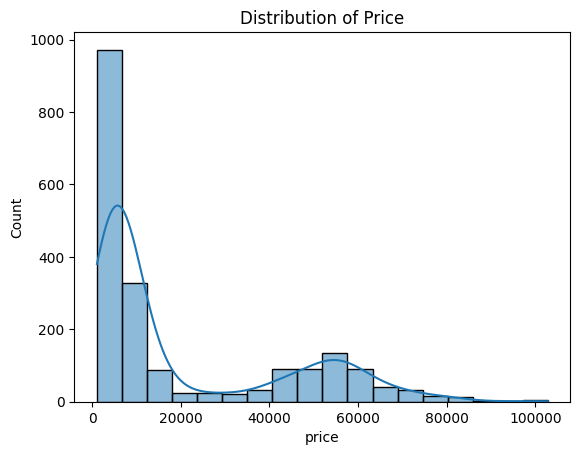

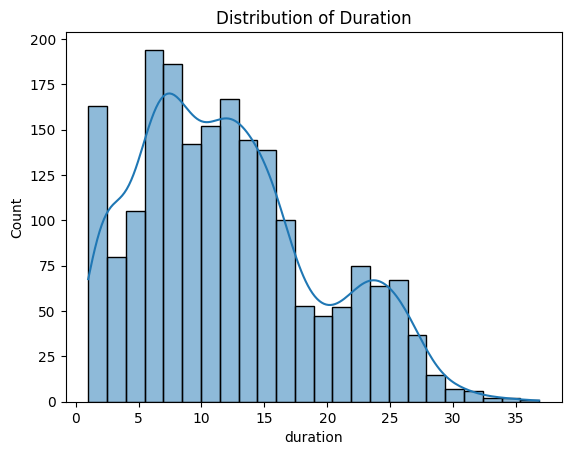

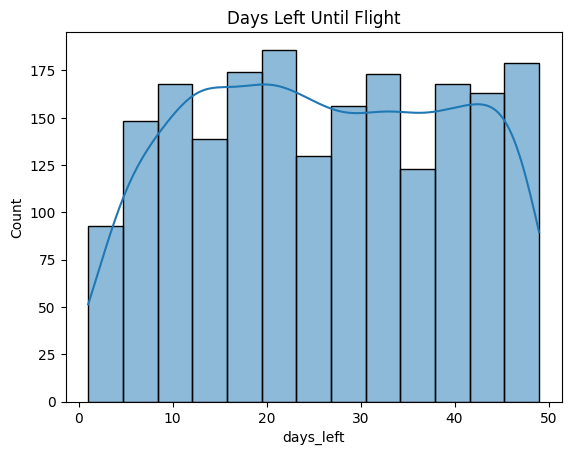

In [26]:
#Distribution of Numerical Features

sns.histplot(data['price'], kde=True)
plt.title("Distribution of Price")
plt.show()

sns.histplot(data['duration'], kde=True)
plt.title("Distribution of Duration")
plt.show()

sns.histplot(data['days_left'], kde=True)
plt.title("Days Left Until Flight")
plt.show()

In [27]:
data['booking_before_one_month'] = ['Yes' if x > 26 else 'No' for x in data['days_left']]
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,booking_before_one_month
0,Air_India,AI-506,Delhi,Morning,1,Early_Morning,Kolkata,Economy,19.75,40,7366,Yes
1,Vistara,UK-706,Kolkata,Morning,1,Night,Mumbai,Business,9.83,42,64831,Yes
2,Vistara,UK-772,Kolkata,Morning,1,Night,Bangalore,Economy,10.50,41,6195,Yes
3,Vistara,UK-824,Chennai,Night,1,Morning,Delhi,Business,14.50,14,60160,No
4,Air_India,AI-501,Bangalore,Afternoon,1,Night,Mumbai,Economy,8.25,20,6578,No


In [28]:
# الرسم البياني الأول (Distribution of Price):

# هذا الرسم البياني هو رسم بياني للمدرج التكراري (histogram) مع تقدير الكثافة (KDE).
# يعرض هذا الرسم البياني توزيع أسعار تذاكر الطيران.
# المحور الأفقي يمثل نطاق الأسعار.
# المحور الرأسي يمثل عدد تذاكر الطيران التي تقع ضمن كل نطاق سعري (أو كثافة التوزيع).
# من هذا الرسم، يمكنك رؤية نطاق الأسعار الأكثر شيوعًا وشكل التوزيع العام للأسعار (على سبيل المثال، ما إذا كان ملتويًا أو متماثلًا).
# الرسم البياني الثاني (Distribution of Duration):

# هذا أيضًا رسم بياني للمدرج التكراري مع تقدير الكثافة (KDE).
# يعرض هذا الرسم البياني توزيع مدة رحلات الطيران بالساعات.
# المحور الأفقي يمثل نطاق مدة الرحلات.
# المحور الرأسي يمثل عدد رحلات الطيران التي تقع ضمن كل نطاق زمني (أو كثافة التوزيع).
# يمكنك رؤية مدى تكرار مدة الرحلات المختلفة وشكل التوزيع (على سبيل المثال، ما إذا كانت معظم الرحلات قصيرة أو طويلة).
# الرسم البياني الثالث (Days Left Until Flight):

# هذا رسم بياني للمدرج التكراري مع تقدير الكثافة (KDE).
# يعرض هذا الرسم البياني توزيع عدد الأيام المتبقية حتى موعد الرحلة وقت شراء التذكرة.
# المحور الأفقي يمثل عدد الأيام المتبقية.
# المحور الرأسي يمثل عدد تذاكر الطيران التي تم شراؤها مع هذا العدد من الأيام المتبقية (أو كثافة التوزيع).
# يمكنك معرفة عدد الأيام التي يميل الناس إلى حجز تذاكرهم قبل الرحلة.

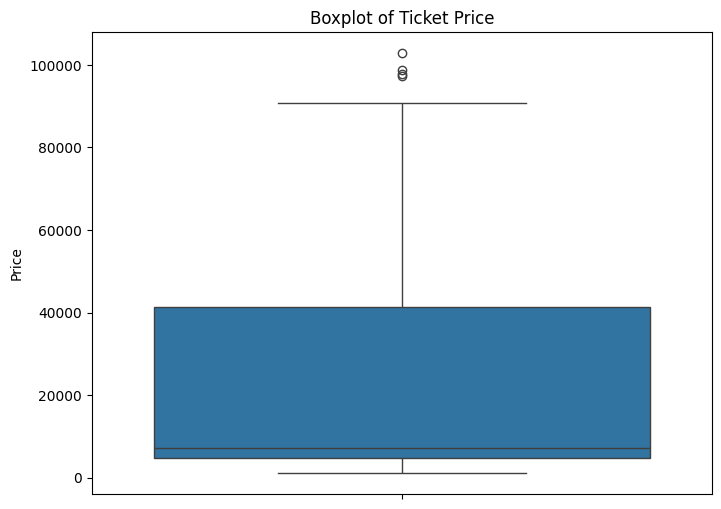

In [29]:
#Boxplot for Price

plt.figure(figsize=(8,6))
sns.boxplot(y=data['price'])
plt.title("Boxplot of Ticket Price")
plt.ylabel("Price")
plt.show()

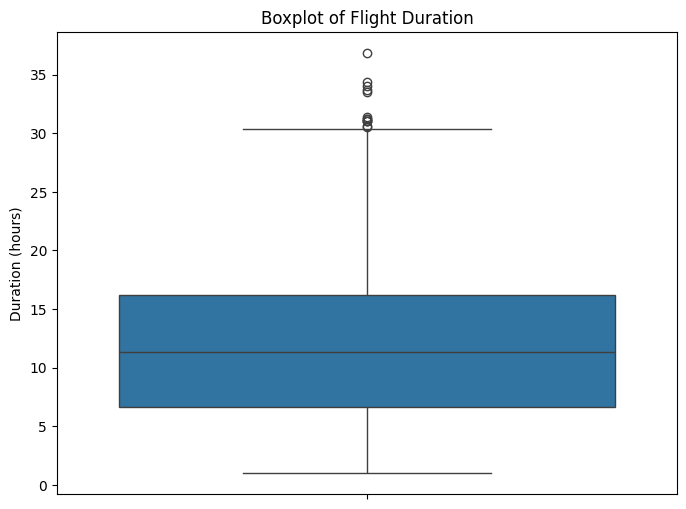

In [30]:
#Boxplot for Duration
plt.figure(figsize=(8,6))
sns.boxplot(y=data['duration'])
plt.title("Boxplot of Flight Duration")
plt.ylabel("Duration (hours)")
plt.show()

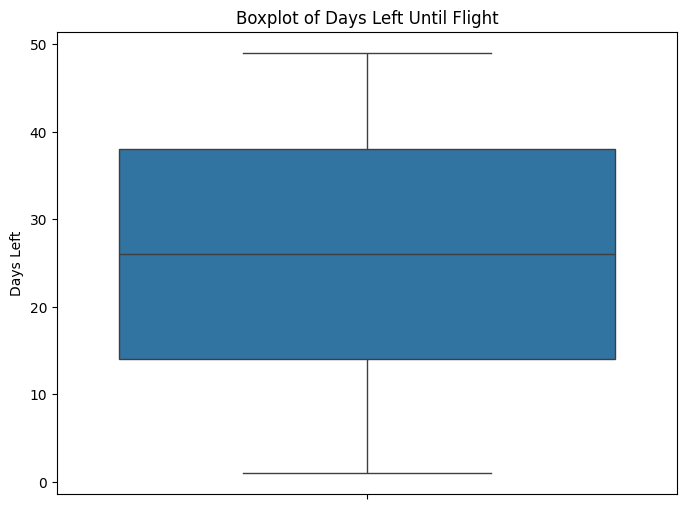

In [31]:
#Boxplot for Days Left
plt.figure(figsize=(8,6))
sns.boxplot(y=data['days_left'])
plt.title("Boxplot of Days Left Until Flight")
plt.ylabel("Days Left")
plt.show()

In [32]:
#Calculate Outliers Using IQR Method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [33]:
outliers_price = detect_outliers(data, 'price')
print("Outliers in Price:")
print(outliers_price[['price', 'airline', 'class']])

outliers_duration = detect_outliers(data, 'duration')
print("\nOutliers in Duration:")
print(outliers_duration[['duration', 'source_city', 'destination_city']])

Outliers in Price:
       price  airline     class
610    97199  Vistara  Business
753    98839  Vistara  Business
1257   97709  Vistara  Business
1437  102832  Vistara  Business

Outliers in Duration:
      duration source_city destination_city
77       31.08     Chennai          Kolkata
135      36.83   Bangalore          Chennai
246      34.00     Chennai        Bangalore
266      31.42   Bangalore           Mumbai
282      33.50     Chennai            Delhi
454      30.50   Bangalore        Hyderabad
678      31.08     Chennai          Kolkata
836      31.00     Chennai        Bangalore
962      33.67     Kolkata          Chennai
1649     31.25   Bangalore           Mumbai
1838     30.58       Delhi          Chennai
1942     31.17   Bangalore          Chennai
1965     34.33   Bangalore          Chennai


In [34]:
#Remove Outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

In [35]:
#Remove outliers from price and duration:
df_cleaned = remove_outliers(data, 'price')
df_cleaned = remove_outliers(df_cleaned, 'duration')

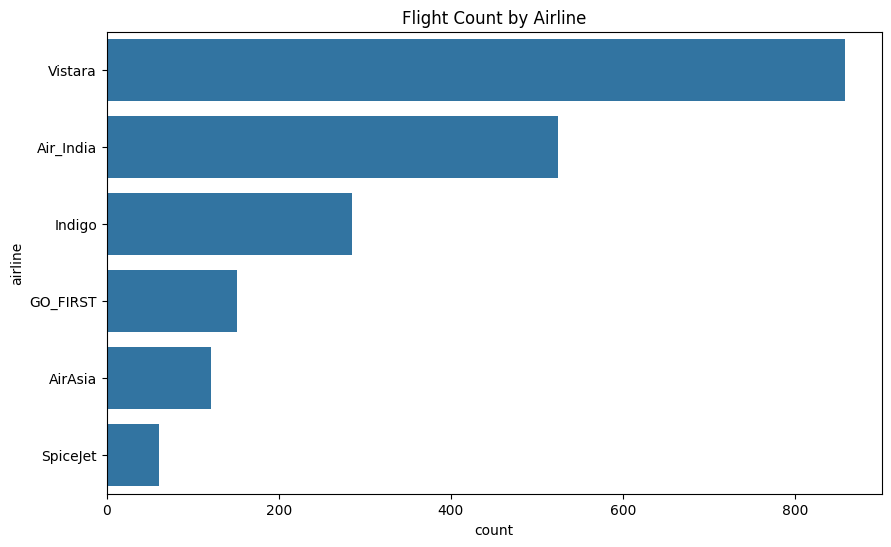

In [36]:
#Categorical Feature Analysis
#Airlines
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='airline', order=data['airline'].value_counts().index)
plt.title("Flight Count by Airline")
plt.show()

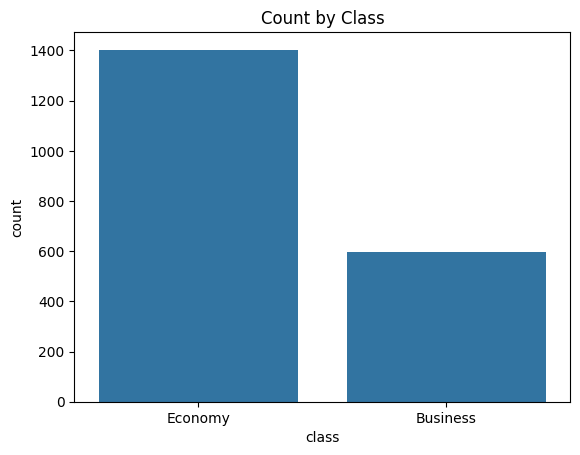

In [37]:
#Class
sns.countplot(data=data, x='class')
plt.title("Count by Class")
plt.show()

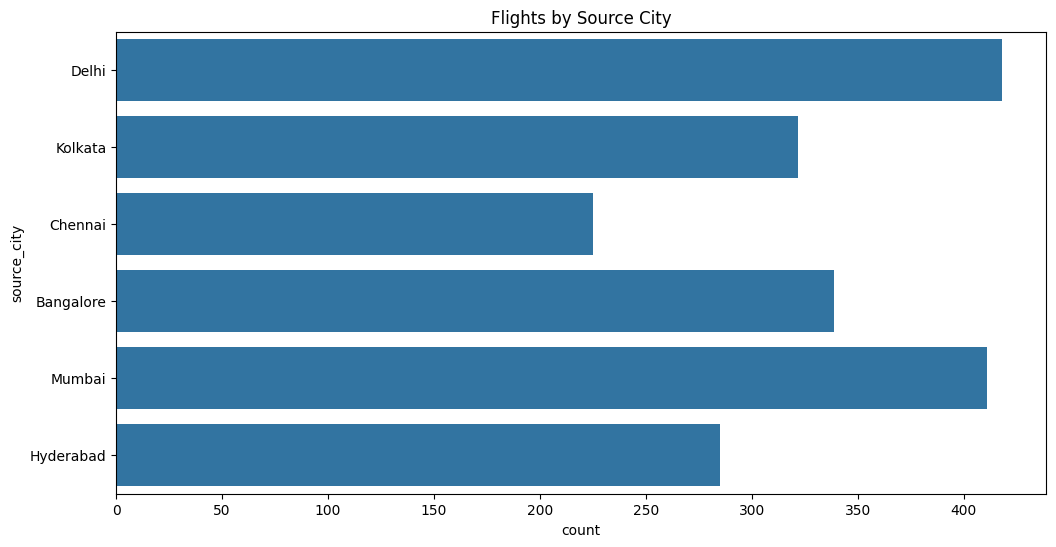

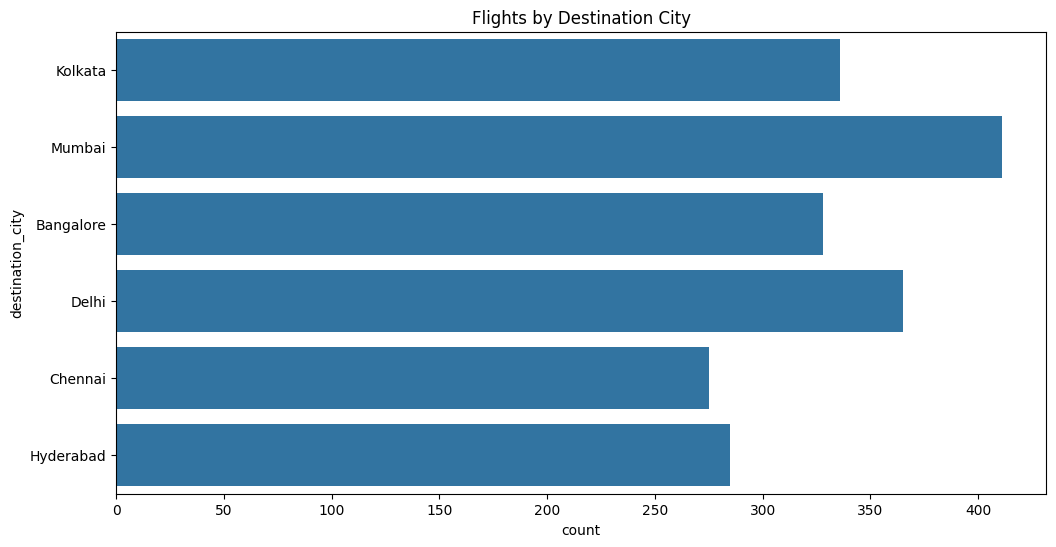

In [38]:
#Source and Destination Cities
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='source_city')
plt.title("Flights by Source City")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='destination_city')
plt.title("Flights by Destination City")
plt.show()

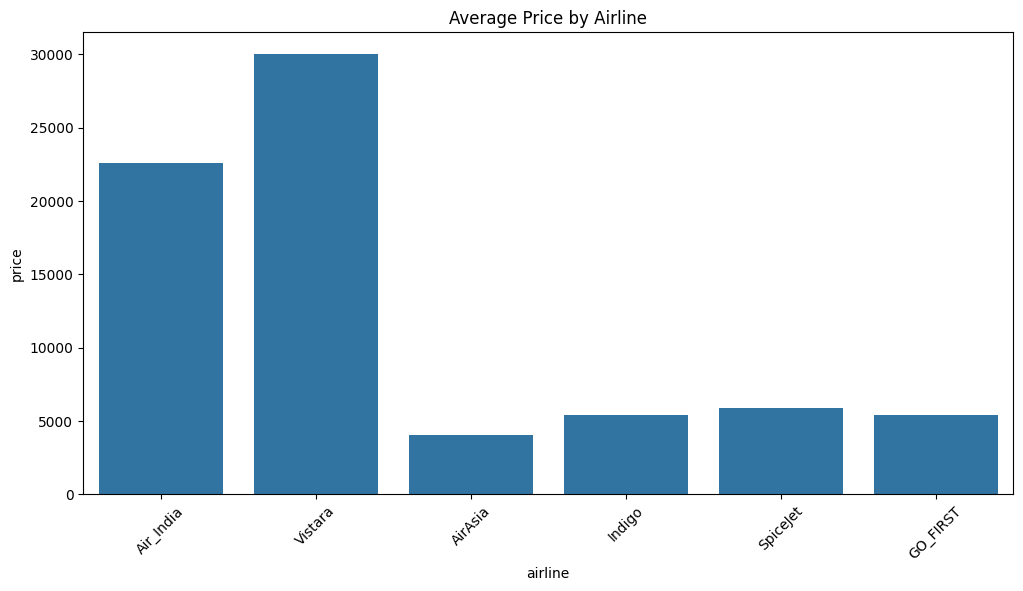

In [39]:
import numpy as np
#Relationship Between Variables
#Price vs Airline
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='airline', y='price', estimator=np.mean,errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Price by Airline")
plt.show()

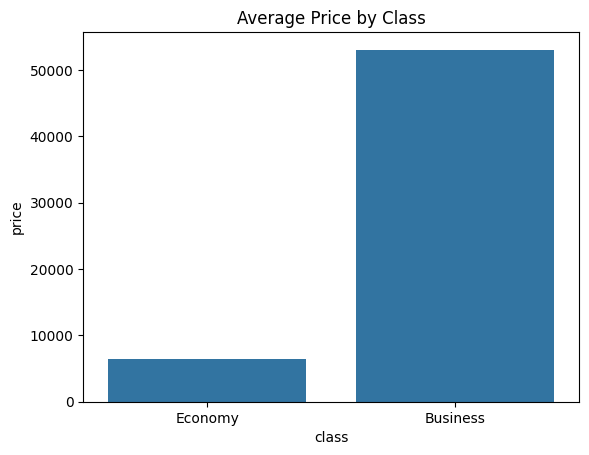

In [40]:
#Price vs Class
sns.barplot(data=data, x='class', y='price', errorbar=None)
plt.title("Average Price by Class")
plt.show()

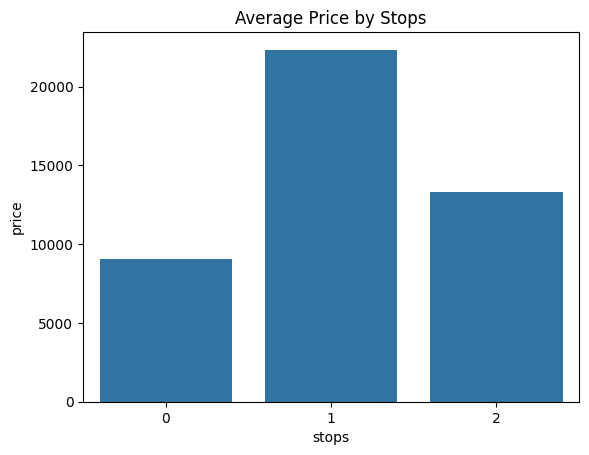

In [41]:
# Price vs Stops
sns.barplot(data=data, x='stops', y='price',errorbar=None)
plt.title("Average Price by Stops")
plt.show()

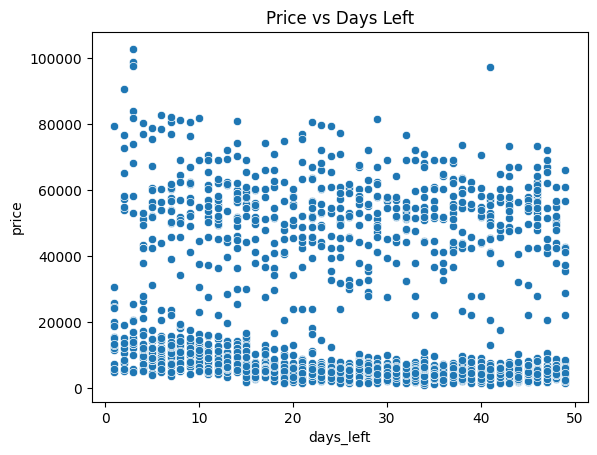

In [42]:
#Price vs Days Left
sns.scatterplot(data=data, x='days_left', y='price')
plt.title("Price vs Days Left")
plt.show()

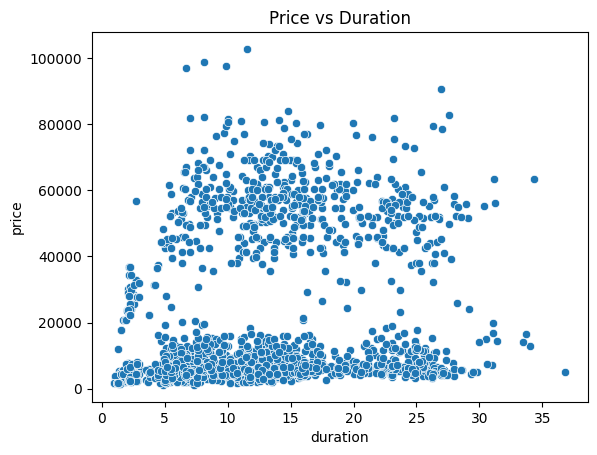

In [43]:
#Duration vs Price
sns.scatterplot(data=data, x='duration', y='price')
plt.title("Price vs Duration")
plt.show()

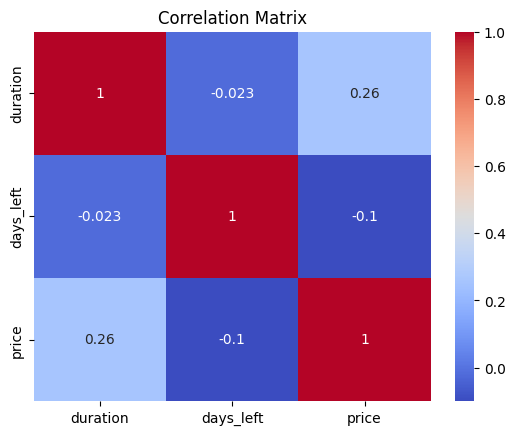

In [44]:
#Correlation Matrix
corr = data[['duration', 'days_left', 'price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

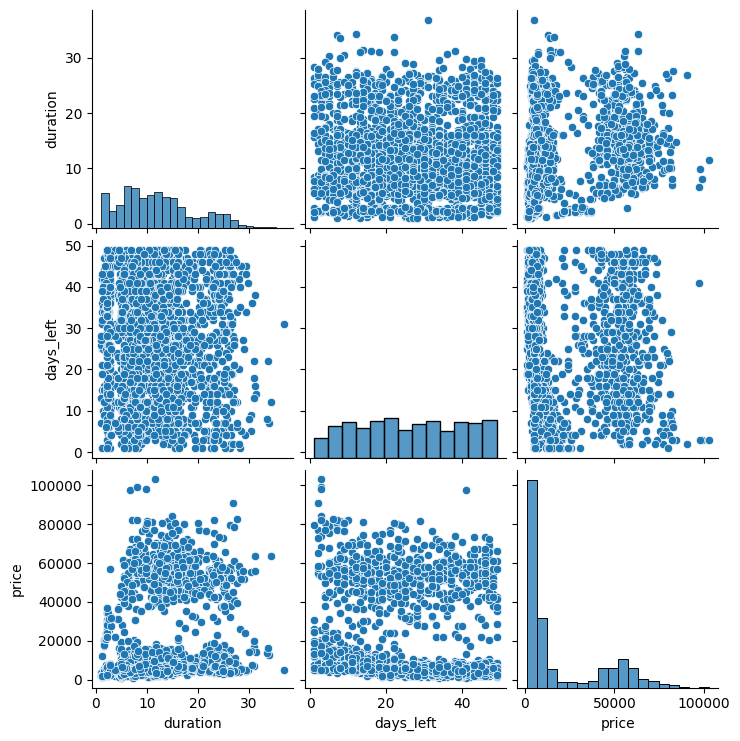

In [45]:
#Pairwise Relationships (Optional)
sns.pairplot(data[['duration', 'days_left', 'price']])
plt.show()

<ipython-input-46-1ca8a0487b54>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='source_city', data=data, palette=pal)


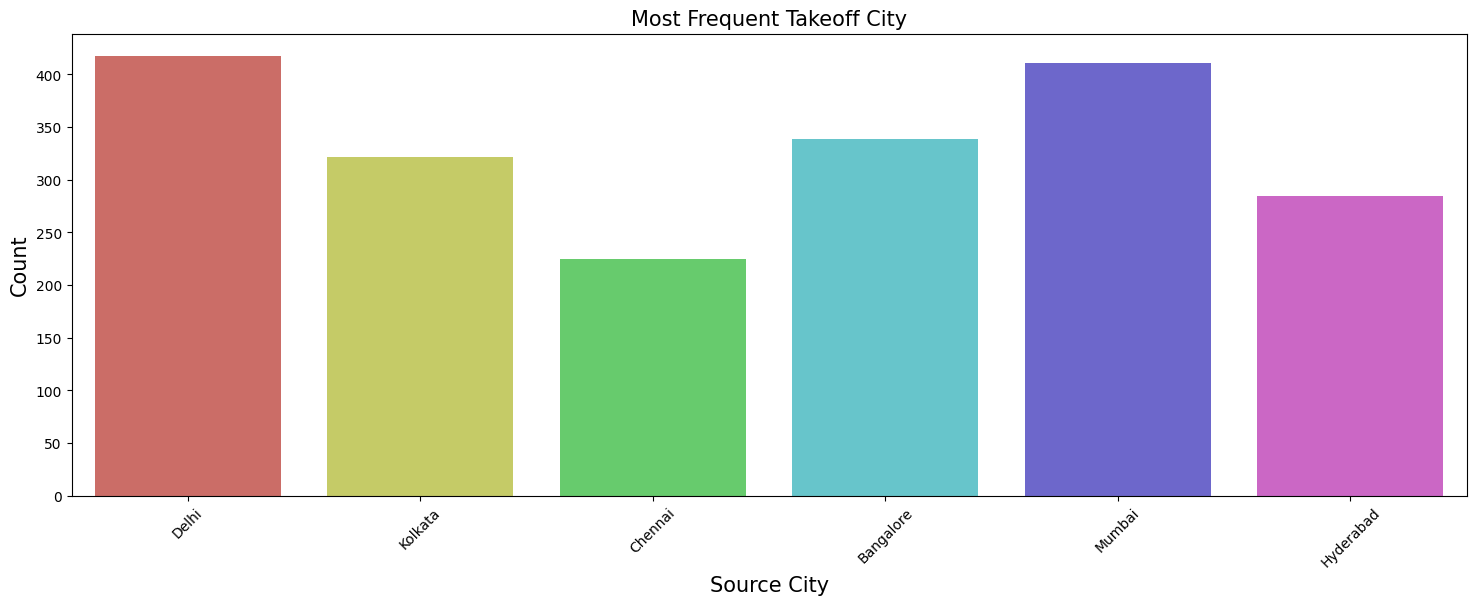

In [46]:
plt.figure(figsize=(18,6))

# Generate a custom color palette with as many colors as unique source cities
pal = sns.color_palette("hls", n_colors=len(data['source_city'].unique()))

# Create the countplot with custom colors
sns.countplot(x='source_city', data=data, palette=pal)

# Add labels and title
plt.title('Most Frequent Takeoff City', fontsize=15)
plt.xlabel('Source City', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)

# Show the plot
plt.show()

<ipython-input-47-6a30745928a5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['departure_time'], palette=pal)


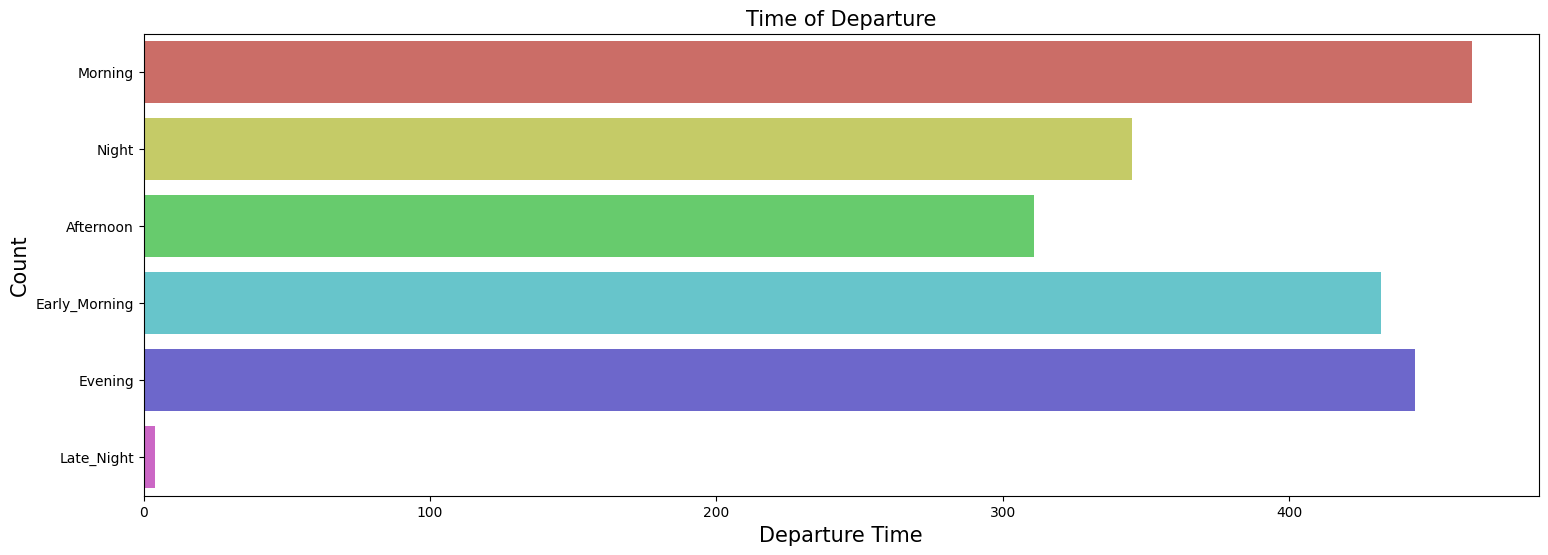

In [47]:
plt.figure(figsize=(18,6))
# Generate a custom color palette with as many colors as unique source cities
pal = sns.color_palette("hls", n_colors=len(data['departure_time'].unique()))
sns.countplot(data['departure_time'], palette=pal)
plt.title('Time of Departure',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

<ipython-input-48-b17647d76b55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['arrival_time'], palette=pal)


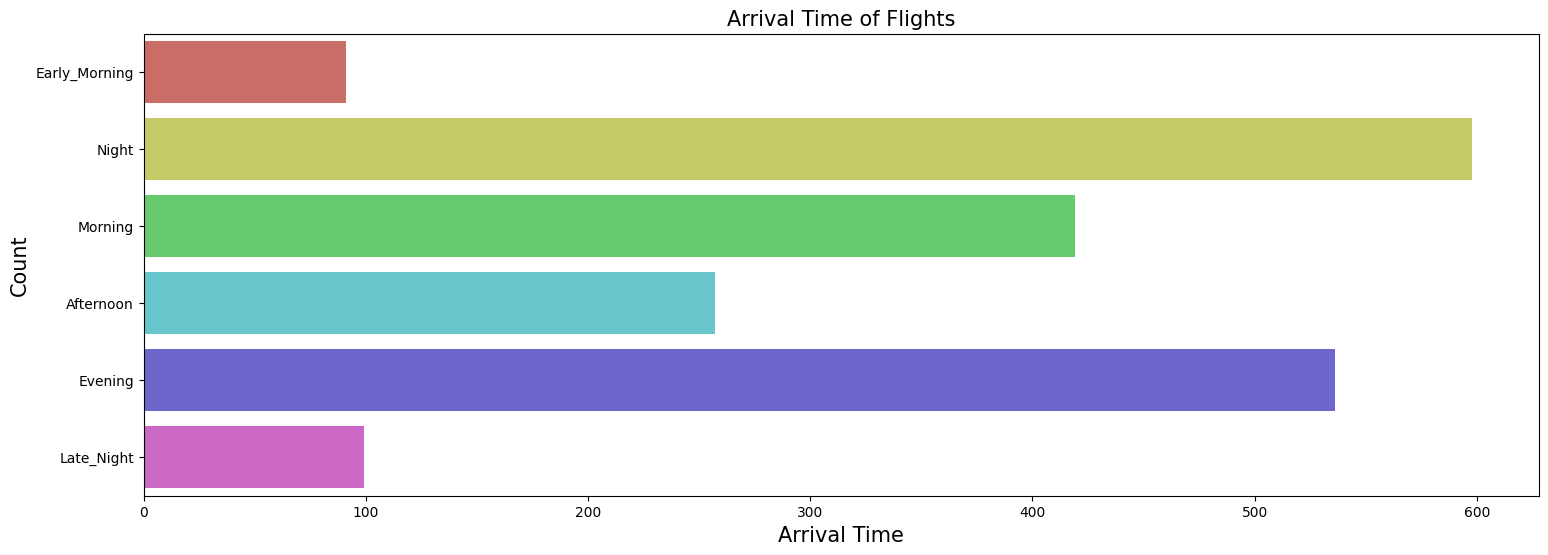

In [48]:
plt.figure(figsize=(18,6))
sns.countplot(data['arrival_time'], palette=pal)
plt.title('Arrival Time of Flights',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

<ipython-input-55-bd29f610f7e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['destination_city'],palette='viridis')


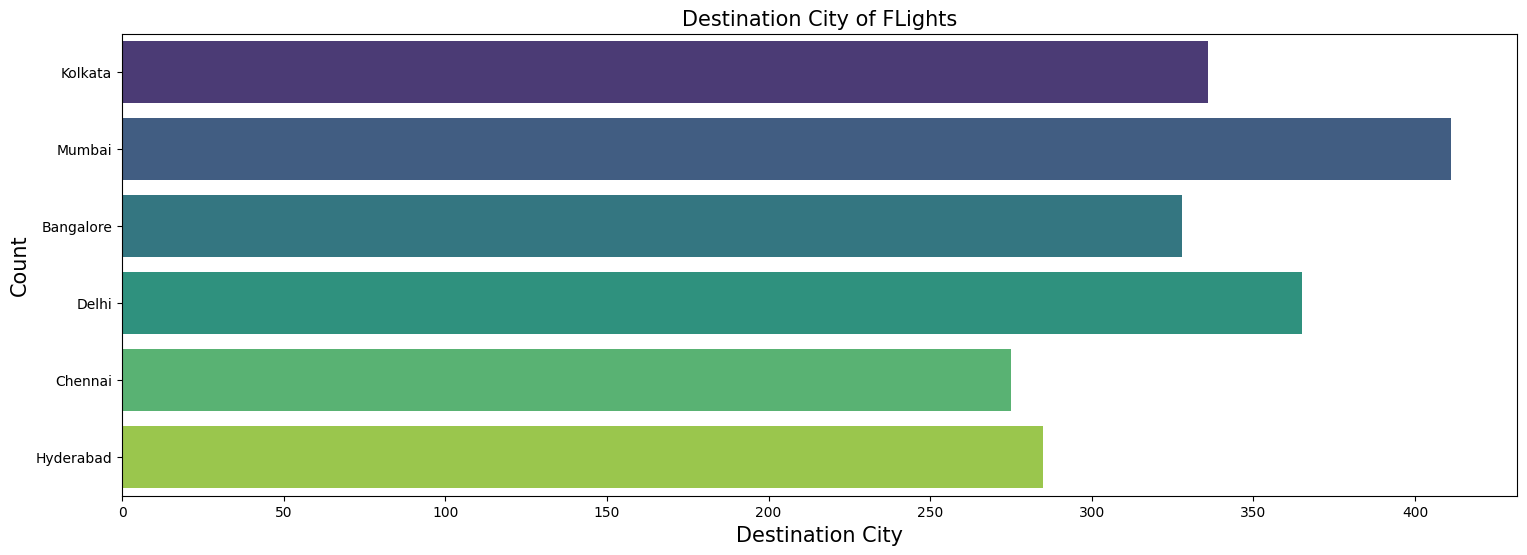

In [55]:
plt.figure(figsize=(18,6))
sns.countplot(data['destination_city'],palette='viridis')
plt.title('Destination City of FLights',fontsize=15)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

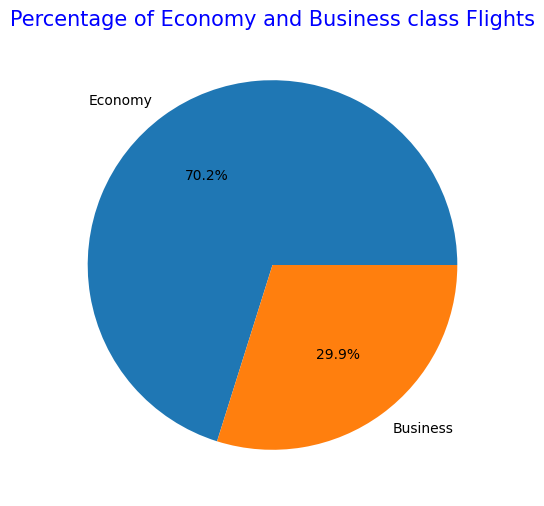

In [50]:
plt.figure(figsize =(10,6))
plt.title('Percentage of Economy and Business class Flights', fontsize=15, color='Blue')
data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

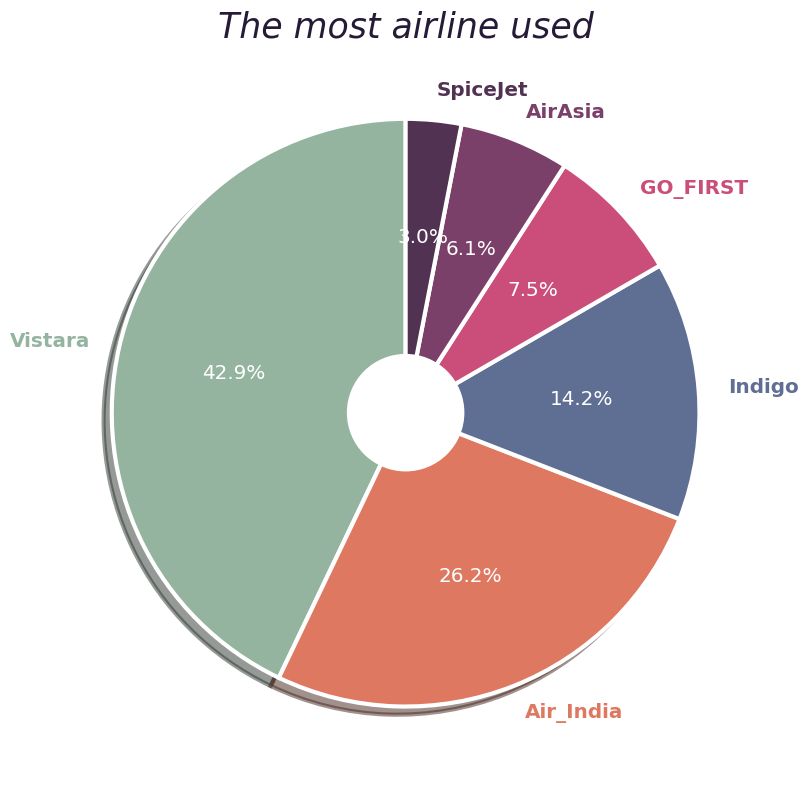

In [51]:
fig, ax = plt.subplots(figsize=(15, 8))
colors=['#94B49F','#DF7861','#5F6F94','#CA4E79','#7A4069','#513252']
colors2=['#A1C298','#C6EBC5','#FBF2C','#FFA7070','#DF7861','#F5C7A9']
patches, texts, pcts = ax.pie(
    data.airline.value_counts(), labels=[*data.airline.value_counts().index],shadow=True, autopct='%.1f%%',colors=colors,
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
centre_circle = plt.Circle((0,0),0.20,fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.title(label='The most airline used',fontsize=25,color='#251B37',fontstyle='italic')
plt.tight_layout()

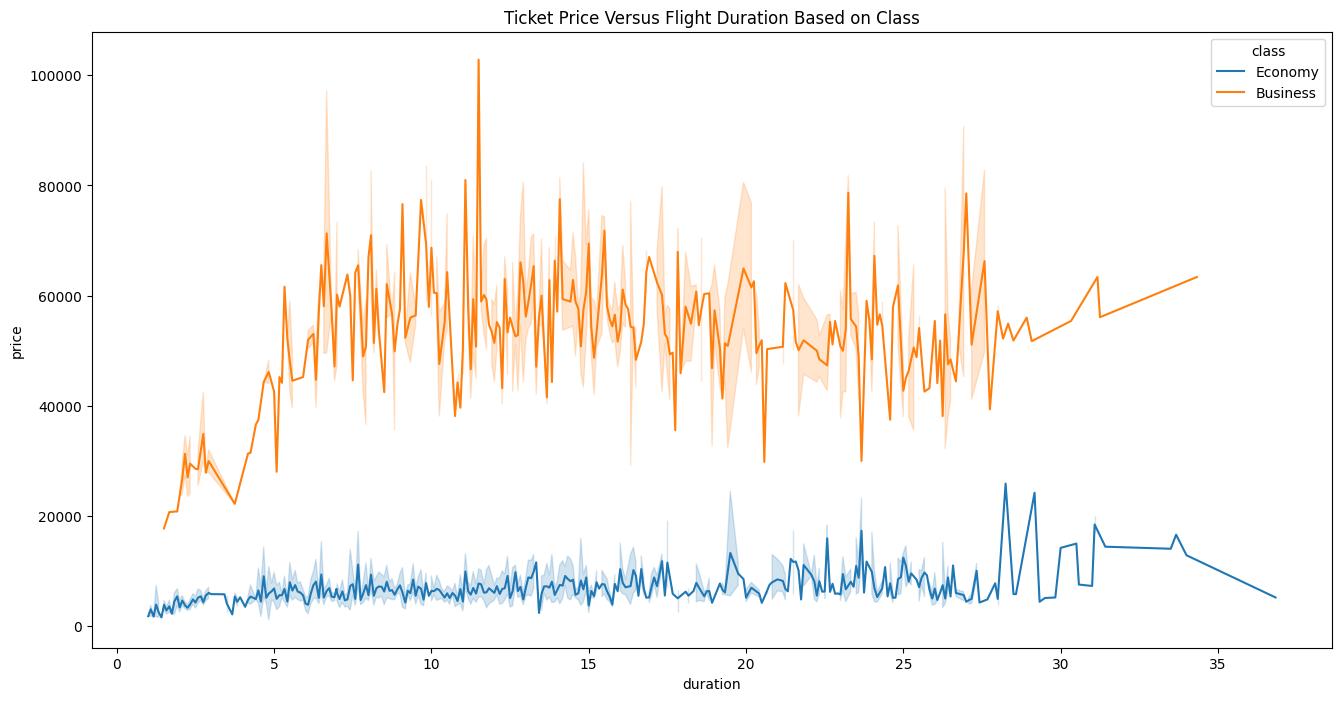

In [52]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = data, x = 'duration', y= 'price', hue = 'class')
plt.title('Ticket Price Versus Flight Duration Based on Class')
plt.show()

In [ ]:
# الرسم البياني الخطي (Price Versus Days Left)

# المحور الأفقي (x-axis): يمثل هذا المحور عدد الأيام المتبقية حتى تاريخ الرحلة (days_left). كلما اتجهنا نحو اليمين على هذا المحور، زاد عدد الأيام المتبقية.
# المحور الرأسي (y-axis): يمثل هذا المحور سعر تذكرة الطيران (price). كلما اتجهنا للأعلى على هذا المحور، ارتفع سعر التذكرة.
# الخط الأزرق: يمثل هذا الخط متوسط سعر التذكرة لكل عدد معين من الأيام المتبقية قبل الرحلة.
# المنطقة المظللة حول الخط الأزرق: تمثل هذه المنطقة فاصل الثقة (confidence interval) لمتوسط السعر. بعبارة أخرى، إنها تعطي نطاقًا من القيم التي من المرجح أن يقع فيها متوسط السعر الحقيقي، مع درجة معينة من الثقة. كلما كانت هذه المنطقة أضيق، كانت تقديرات متوسط السعر أكثر دقة.
# كيفية قراءة الرسم البياني:

# بشكل عام، يمكنك قراءة الرسم البياني من اليسار إلى اليمين لفهم كيف يتغير متوسط سعر التذكرة مع تغير عدد الأيام المتبقية قبل الرحلة.

# في بداية الرسم (عدد قليل من الأيام المتبقية): انظر إلى النقطة التي يبدأ عندها الخط الأزرق على اليسار. هذه النقطة تمثل متوسط سعر التذاكر التي تم شراؤها قبل وقت قصير جدًا من تاريخ الرحلة.
# مع زيادة عدد الأيام المتبقية: تتبع مسار الخط الأزرق كلما انتقلت نحو اليمين على المحور الأفقي.
# إذا كان الخط يتجه للأعلى، فهذا يعني أن متوسط سعر التذاكر يميل إلى الارتفاع مع زيادة عدد الأيام المتبقية.
# إذا كان الخط يتجه للأسفل، فهذا يعني أن متوسط سعر التذاكر يميل إلى الانخفاض مع زيادة عدد الأيام المتبقية.
# إذا كان الخط مستقيمًا تقريبًا، فهذا يعني أن متوسط السعر لا يتغير بشكل كبير مع عدد الأيام المتبقية.
# ما يمكن استنتاجه من هذا الرسم البياني:

# من خلال ملاحظة شكل الخط واتجاهه، يمكنك استخلاص استنتاجات حول العلاقة بين الوقت الذي تحجز فيه تذكرتك وسعرها. على سبيل المثال، إذا رأيت أن الخط يتجه للأسفل بشكل ملحوظ عندما يكون عدد الأيام المتبقية كبيرًا، فهذا قد يشير إلى أن الحجز مبكرًا قد يؤدي إلى أسعار أقل. إذا رأيت أن الخط يرتفع بشكل حاد عندما يكون عدد الأيام المتبقية صغيرًا، فهذا قد يشير إلى أن الحجز في اللحظة الأخيرة قد يكون أغلى.

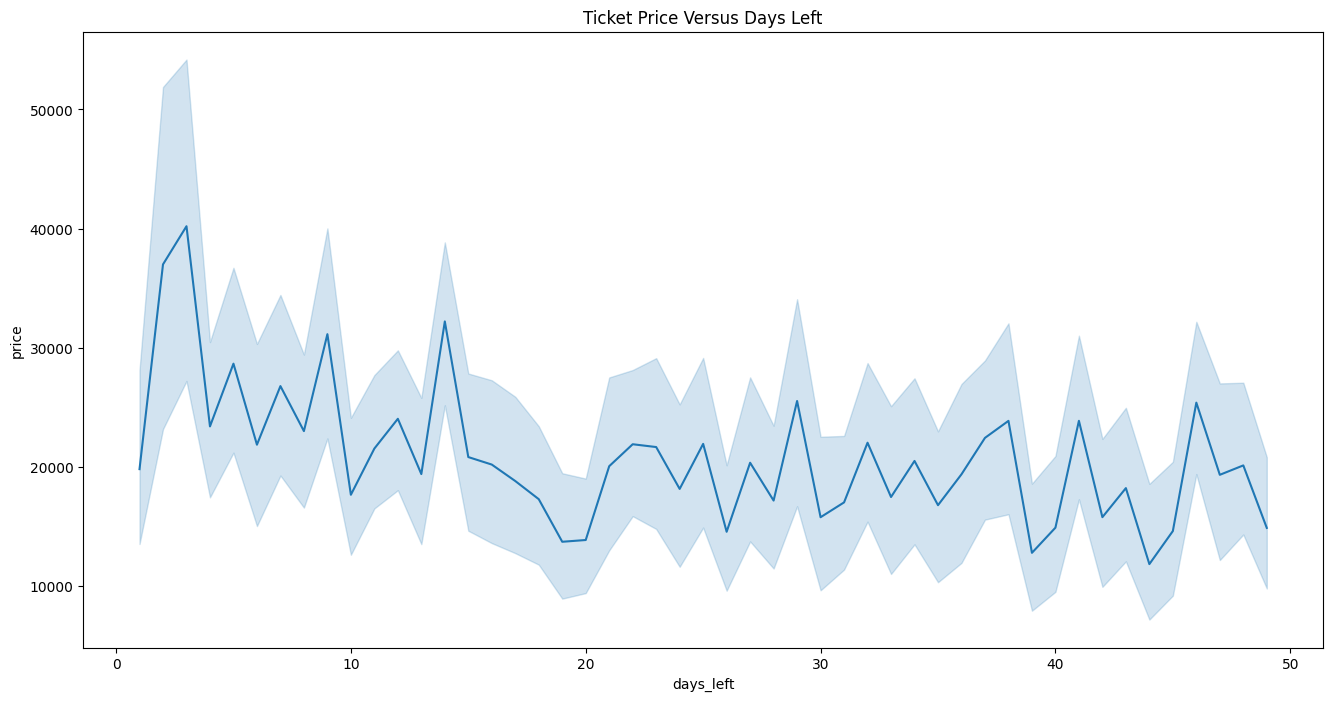

In [53]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = data, x = 'days_left', y= 'price')
plt.title('Ticket Price Versus Days Left')
plt.show()

In [ ]:
# الرسم البياني الخطي (Ticket Price Versus Days Left)

# هذا الرسم البياني يوضح العلاقة بين عدد الأيام المتبقية قبل الرحلة (Days Left) وسعر التذكرة (Price).

# المحور الأفقي (X-axis - Days Left): يمثل هذا المحور عدد الأيام المتبقية حتى تاريخ الرحلة. القيم على هذا المحور تزداد كلما اتجهنا نحو اليمين، مما يعني أننا نتحرك من الحجز في اللحظة الأخيرة (عدد قليل من الأيام المتبقية) إلى الحجز مبكرًا (عدد كبير من الأيام المتبقية).
# المحور الرأسي (Y-axis - Price): يمثل هذا المحور سعر تذكرة الطيران. القيم على هذا المحور تزداد كلما اتجهنا للأعلى، مما يعني أن السعر يرتفع.
# الخط الأزرق: هذا الخط يمثل متوسط سعر تذكرة الطيران لكل عدد معين من الأيام المتبقية قبل الرحلة.
# المنطقة المظللة حول الخط الأزرق: هذه المنطقة تمثل فاصل الثقة (confidence interval) لمتوسط السعر. بعبارة أخرى، تعطيك هذه المنطقة نطاقًا من القيم التي من المرجح أن يقع فيها متوسط السعر الحقيقي، مع درجة معينة من الثقة (عادةً 95% بشكل افتراضي في مكتبة Seaborn). كلما كانت هذه المنطقة أضيق، كانت تقديرات متوسط السعر أكثر دقة.
# كيفية قراءة وفهم نتيجة الرسم البياني:

# لقراءة هذا الرسم البياني وفهم النتيجة، انظر إلى مسار الخط الأزرق من اليسار إلى اليمين:

# عندما يكون عدد الأيام المتبقية قليلًا (على الجانب الأيسر من الرسم البياني):

# انظر إلى ارتفاع الخط الأزرق في هذه المنطقة. هذا يمثل متوسط سعر التذاكر التي يتم شراؤها قبل وقت قصير جدًا من موعد الرحلة.
# إذا كان الخط عاليًا في هذه المنطقة، فهذا يشير إلى أن الحجز في اللحظة الأخيرة يميل إلى أن يكون مكلفًا.
# مع زيادة عدد الأيام المتبقية (بين الجانب الأيسر والجانب الأيمن):

# تتبع مسار الخط الأزرق مع تحركك نحو اليمين.
# إذا كان الخط ينخفض بشكل ملحوظ: هذا يعني أن متوسط سعر التذكرة يميل إلى الانخفاض مع زيادة عدد الأيام المتبقية (الحجز مبكرًا يؤدي إلى أسعار أقل).
# إذا كان الخط يرتفع بشكل ملحوظ: هذا يعني أن متوسط سعر التذكرة يميل إلى الارتفاع مع زيادة عدد الأيام المتبقية (الحجز مبكرًا يؤدي إلى أسعار أعلى).
# إذا كان الخط مستقيمًا تقريبًا أو يتغير قليلاً: هذا يعني أن العلاقة بين الأيام المتبقية والسعر ليست قوية جدًا في هذا النطاق.
# عندما يكون عدد الأيام المتبقية كبيرًا (على الجانب الأيمن من الرسم البياني):

# انظر إلى ارتفاع الخط الأزرق في هذه المنطقة. هذا يمثل متوسط سعر التذاكر التي يتم شراؤها قبل وقت طويل جدًا من موعد الرحلة.
# قارن هذا الارتفاع بارتفاع الخط على الجانب الأيسر لترى ما إذا كان الحجز مبكرًا جدًا يؤدي إلى أسعار أعلى أو أقل مقارنة بالحجز في اللحظة الأخيرة.
# ما يمكن أن تستنتجه بشكل عام من هذا الرسم البياني:

# الشكل العام للخط الأزرق سيخبرك عن الاستراتيجية الأكثر شيوعًا للحجز في بياناتك وكيف يؤثر ذلك على السعر. على سبيل المثال:

# إذا كان الخط ينخفض بشكل عام كلما زاد عدد الأيام المتبقية، فهذا يعني أن الحجز مبكرًا يميل إلى أن يكون أرخص.
# إذا كان الخط على شكل حرف "U" (ينخفض أولاً ثم يرتفع)، فهذا قد يشير إلى أن هناك نقطة زمنية مثالية للحجز للحصول على أفضل سعر (ليست مبكرة جدًا وليست متأخرة جدًا).
# إذا كان الخط يرتفع بشكل حاد في النهاية، فهذا يؤكد أن الحجز في اللحظة الأخيرة يصبح أكثر تكلفة.

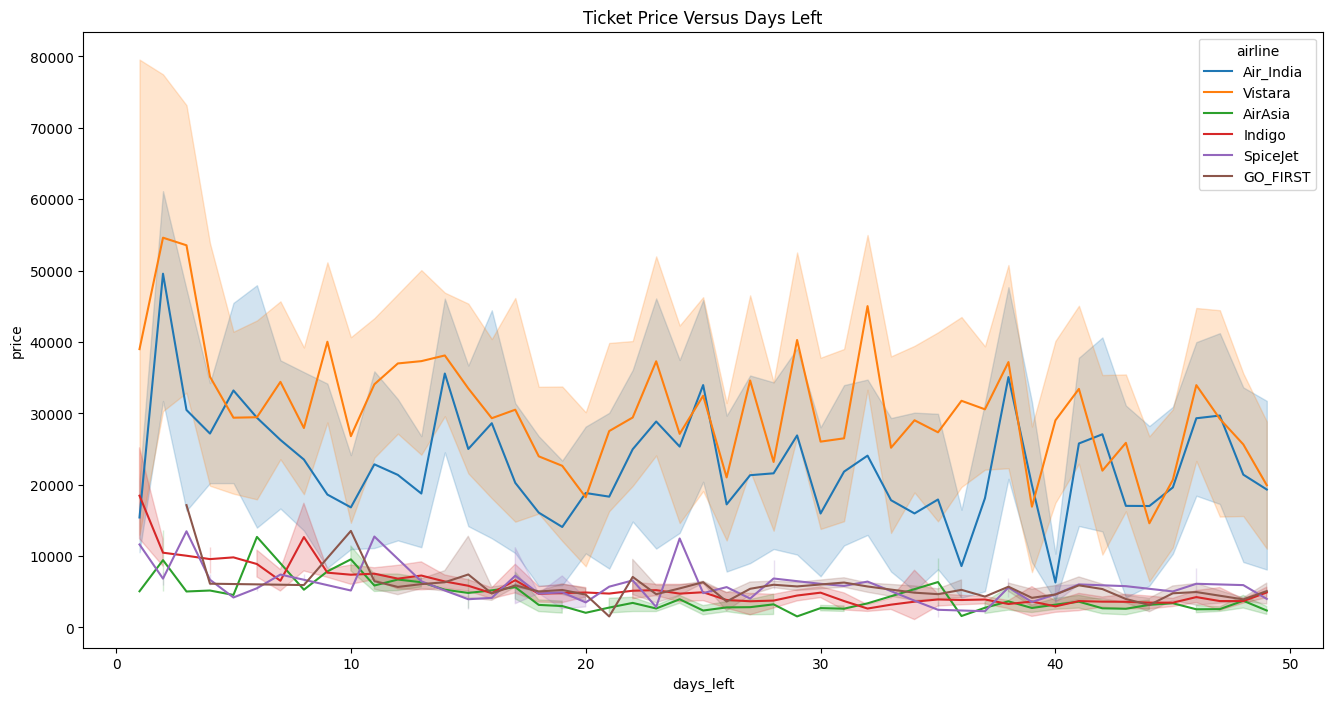

In [54]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = data, x = 'days_left', y= 'price', hue = 'airline')
plt.title('Ticket Price Versus Days Left')
plt.show()

<ipython-input-56-152172b59a1d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='source_city', data=filtered_data, palette='Set2')


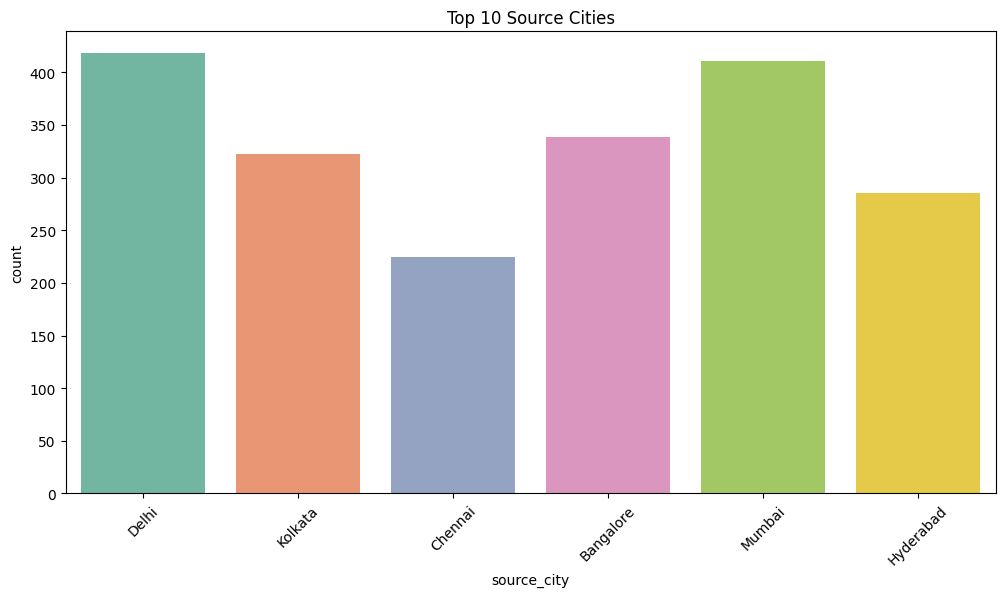

In [56]:
top_cities = data['source_city'].value_counts().nlargest(10).index
filtered_data = data[data['source_city'].isin(top_cities)]

plt.figure(figsize=(12,6))
sns.countplot(x='source_city', data=filtered_data, palette='Set2')
plt.xticks(rotation=45)
plt.title('Top 10 Source Cities')
plt.show()

In [90]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.4 MB/s eta 0:00:00


In [68]:
#abel Encoding All Categorical Features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [69]:
x = data.drop(['price'], axis=1)
y = data['price']

In [70]:
#Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [71]:
#Feature Scaling (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1))
x_train = mmscaler.fit_transform(x_train)
x_test = mmscaler.transform(x_test)

# Convert back to DataFrame
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.svm import SVR
#Bayesian Ridge Regression
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
# Huber Regressor (Robust to Outliers)
from sklearn.linear_model import HuberRegressor
from catboost import CatBoostRegressor
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(),
    KNeighborsRegressor(n_neighbors=5),
    BaggingRegressor(),
    Ridge(),
    Lasso(alpha=0.1),
    SVR(kernel='rbf'),
    MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42),
    CatBoostRegressor(verbose=0),
    LGBMRegressor(),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    HuberRegressor(),
    BayesianRidge()
]

In [93]:
model_dict = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "KNeighbors" : KNeighborsRegressor(),
    "Extra Trees" :ExtraTreesRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor" : xgb.XGBRegressor(),
    "BaggingRegressor" : BaggingRegressor(),
    "Ridge" :Ridge(),
    "Lasso" : Lasso(),
    "MLPRegressor" : MLPRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(),
    "LGBMRegressor" : LGBMRegressor(),
    "ElasticNet" : ElasticNet(),
    "HuberRegressor" : HuberRegressor(),
    "BayesianRidge" : BayesianRidge()
}


In [94]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [95]:
from sklearn import metrics
import numpy as np
import pandas as pd

# Make sure Results is initialized as an empty DataFrame
Results = pd.DataFrame(columns=[
    'Model Name',
    'Mean_Absolute_Error_MAE',
    'Adj_R_Square',
    'Root_Mean_Squared_Error_RMSE',
    'Mean_Absolute_Percentage_Error_MAPE',
    'Mean_Squared_Error_MSE',
    'Root_Mean_Squared_Log_Error_RMSLE',
    'R2_score'
])

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
    mape = MAPE(y_test, y_pred)
    rmsle = np.log(rmse)

    # Create a new DataFrame row
    new_row = pd.DataFrame([{
        'Model Name': str(model.__class__.__name__),
        'Mean_Absolute_Error_MAE': mae,
        'Adj_R_Square': adj_r2,
        'Root_Mean_Squared_Error_RMSE': rmse,
        'Mean_Absolute_Percentage_Error_MAPE': mape,
        'Mean_Squared_Error_MSE': mse,
        'Root_Mean_Squared_Log_Error_RMSLE': rmsle,
        'R2_score': r2
    }])

    # Use pd.concat to add the new row
    Results = pd.concat([Results, new_row], ignore_index=True)

<ipython-input-95-fc335a0051f8>:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Results = pd.concat([Results, new_row], ignore_index=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 11
[LightGBM] [Info] Start training from score 20374.205714


In [97]:
result_df = Results.sort_values(by='Adj_R_Square', ascending=False).reset_index(drop=True)
result_df

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,CatBoostRegressor,2831.921940,0.952544,4951.237627,20.762518,2.451475e+07,8.507393,0.953416
1,XGBRegressor,2915.311768,0.949488,5108.175604,22.830044,2.609346e+07,8.538598,0.950416
2,RandomForestRegressor,2855.954150,0.948996,5133.000782,20.544036,2.634770e+07,8.543446,0.949933
3,ExtraTreesRegressor,2935.040550,0.946808,5241.933835,20.541969,2.747787e+07,8.564446,0.947785
4,LGBMRegressor,2998.133315,0.946504,5256.912174,21.791783,2.763513e+07,8.567299,0.947486
5,GradientBoostingRegressor,3044.428665,0.946271,5268.342293,22.797964,2.775543e+07,8.569471,0.947258
6,BaggingRegressor,2917.000500,0.943157,5418.837930,20.864380,2.936380e+07,8.597637,0.944201
7,KNeighborsRegressor,3999.364667,0.920236,6419.073414,31.337560,4.120450e+07,8.767029,0.921701
8,MLPRegressor,4004.302749,0.918733,6479.257728,29.843930,4.198078e+07,8.776361,0.920226
9,DecisionTreeRegressor,3459.666667,0.915302,6614.643621,22.738579,4.375351e+07,8.797041,0.916857


Learning rate set to 0.043179
0:	learn: 21752.4842509	total: 22ms	remaining: 21.9s
1:	learn: 20916.3474614	total: 23.1ms	remaining: 11.5s
2:	learn: 20144.6230001	total: 24.2ms	remaining: 8.04s
3:	learn: 19410.9254315	total: 26ms	remaining: 6.47s
4:	learn: 18785.8657457	total: 32.3ms	remaining: 6.44s
5:	learn: 18104.5810015	total: 32.7ms	remaining: 5.42s
6:	learn: 17461.5926453	total: 33.3ms	remaining: 4.73s
7:	learn: 16821.4563552	total: 34.9ms	remaining: 4.32s
8:	learn: 16237.4749975	total: 37.4ms	remaining: 4.12s
9:	learn: 15673.6650477	total: 39.1ms	remaining: 3.87s
10:	learn: 15130.6365107	total: 41.7ms	remaining: 3.75s
11:	learn: 14627.7030583	total: 43.4ms	remaining: 3.58s
12:	learn: 14149.5360005	total: 50.2ms	remaining: 3.81s
13:	learn: 13714.4650158	total: 52ms	remaining: 3.66s
14:	learn: 13243.7796552	total: 53.7ms	remaining: 3.53s
15:	learn: 12790.8134934	total: 59.9ms	remaining: 3.68s
16:	learn: 12367.7663535	total: 60.7ms	remaining: 3.51s
17:	learn: 11977.6491158	total: 64

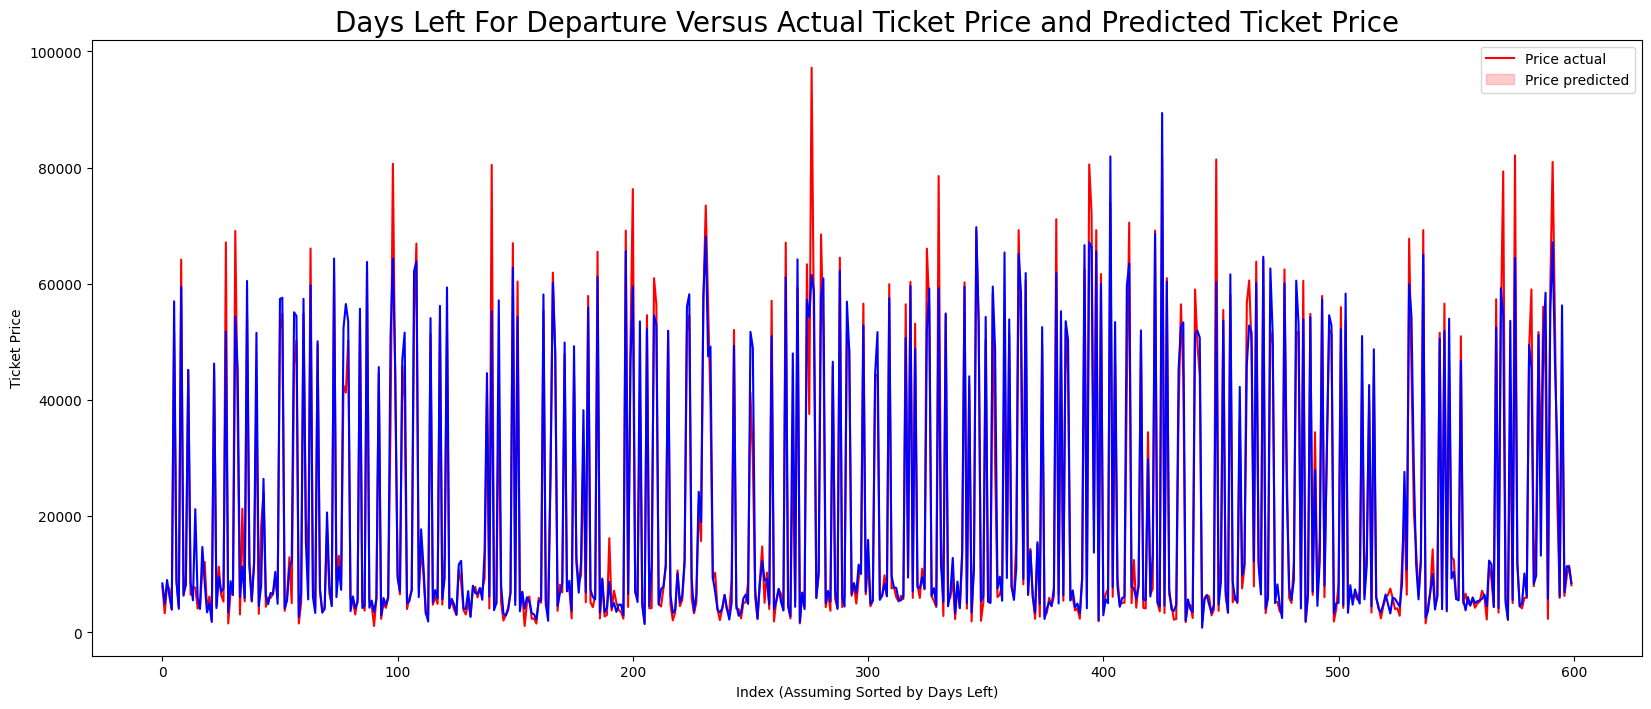

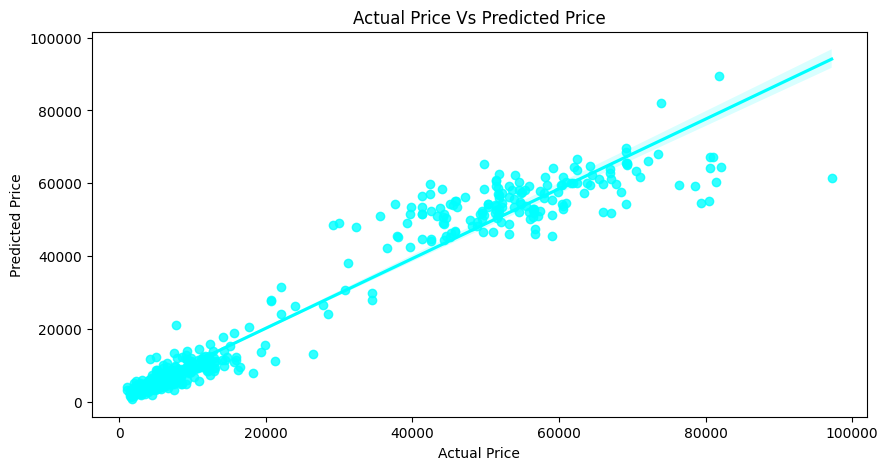

In [98]:
# Predict with best model
modelCatBoostRegressor= CatBoostRegressor()
modelCatBoostRegressor.fit(x_train, y_train)
y_pred = modelCatBoostRegressor.predict(x_test)

# Create comparison DataFrame
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)

# Plot Actual vs Predicted over Days Left
plt.figure(figsize=(20, 8))
sns.lineplot(data=comparison, x=comparison.index, y='Actual', color='red')
sns.lineplot(data=comparison, x=comparison.index, y='Predicted', color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price', fontsize=20)
plt.legend(labels=['Price actual', 'Price predicted'])
plt.xlabel('Index (Assuming Sorted by Days Left)')
plt.ylabel('Ticket Price')
plt.show()

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 5))
sns.regplot(x='Actual', y='Predicted', data=comparison, color='cyan')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
# شركة الطيران
# المدينة المصدر
# وقت الإقلاع
# عدد المحطات
# المدينة الوجهة
# نوع التذكرة (اقتصادية / أعمال)
# مدة الرحلة
# الأيام المتبقية حتى موعد السفر

In [99]:
#  خطوات التنبؤ
# استخدام نفس المعالجة المسبقة التي طبقتها على البيانات الأصلية.
# تحويل البيانات باستخدام LabelEncoder كما فعلت من قبل.
# تطبيق MinMaxScaler .
# استخدام النموذج المدرب

In [100]:
# airline
# Air_India
# source_city
# Delhi
# departure_time
# Morning
# stops
# one
# destination_city
# Mumbai
# class
# Economy
# duration
# 8.5
# days_left
# 30

In [102]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,booking_before_one_month
0,1,219,2,4,1,1,4,1,19.75,40,7366,1
1,5,524,4,4,1,5,5,0,9.83,42,64831,1
2,5,532,4,4,1,5,0,1,10.50,41,6195,1
3,5,557,1,5,1,4,2,0,14.50,14,60160,0
4,1,214,0,0,1,5,5,1,8.25,20,6578,0


In [103]:
# بيانات التذكرة الجديدة
new_data = pd.DataFrame([{
    'airline': 'Air_India',
    'flight': 'AI-506',
    'source_city': 'Delhi',
    'departure_time': 'Morning',
    'stops': 'one',
    'arrival_time': 'Night',
    'destination_city': 'Mumbai',
    'class': 'Economy',
    'duration': 8.5,
    'days_left': 30,
    'booking_before_one_month': int(30 > 30)  # إذا كانت الأيام المتبقية أكثر من 30 يوم → 1 وإلا 0
}])

# إزالة الأعمدة غير المستخدمة أو إعادة ترتيب الأعمدة لتتطابق مع x.columns
new_data = new_data[x.columns]  # الآن يجب أن يعمل بدون خطأ

In [104]:
# تحويل القيم الفئوية باستخدام LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in new_data.select_dtypes(include=['object']).columns:
    new_data[col] = le.fit_transform(new_data[col])

# تطبيق MinMaxScaler
new_data_scaled = mmscaler.transform(new_data)

# التنبؤ بالسعر باستخدام أفضل نموذج (مثلاً ExtraTreesRegressor)
predicted_price = modelCatBoostRegressor.predict(new_data_scaled)
print(f"\n💰 السعر المتوقع للتذكرة: {int(predicted_price[0])}")


💰 السعر المتوقع للتذكرة: 37491
